Em um primeiro momento, para a construção do modelo, valores aleatórios foram utilizados, no decorrer do projeto, valores mais aceitáveis e calculados foram adicionados para a implementação do modelo.

# Modelo de transmissão de energia sem fio- Projeto de Eletromagnetismo

### 1) Diagrama do circuito eletrodinâmico WPT

<img src="circuito.jpeg">

### 2) Elaboração do código numérico

Importando as bibliotecas utilizadas:

In [4]:
from cmath import *
from math import *
from numpy import *
import matplotlib.pyplot as plt

Primeiro vamos calcular as impedâncias equivalentes de cada bobina:


In [12]:
#Declarando variáveis globais
global C1
global R1
global L1
global w_reson
global XC1
global XL1
global C2
global L2
global R2
global Rc
global Uf
global XC2
global XL2
global M
global ZeqC2RC

In [18]:
#BOBINA 1

C1 = 1e-5
R1 = 5
L1 = 2e-5

#primeiro é necessário calcular o w do circuito, em um circuito RL o w é dado por 1/(lc)**0.5
w_reson = 1/sqrt(L1*C1)

In [19]:
#Depois vamos calcular as impedâncias equivalentes da bobina 1
XC1 = 1 /(1j*w*C1)
XL1 = 1j*w*L1
ZeqB1 = R1 + XC1 + L1

In [29]:
#BOBINA 2
C2 = 1e-5
Rc = 400
L2 = 2e-5
R2 = 5

XC2 = 1 /(1j*w*C2)
XL2 = 1j*w*L2

#porém agora a impedância equivalente será calculada levando em conta que o capacitor C2 está em paralelo com o resistor Rc
ZeqC2RC = 1/((1/XC2)+(1/Rc))
ZeqB2 = R2 + XL2 + ZeqC2RC

Uf = 10


k = 0.6 
M = k * sqrt(L1*L2)

1/(2*pi*sqrt(L2*C2))
XL2

1.414213562373095j

### 3) Construção dos gráficos I1 (corrente na bobina primáaria) e I2 (corrente na bobina secundária)

In [30]:
#Agora vamos fazer uma função que devolve as correntes para facilitar o plot do gráfico
def correntes (f,k):
    w = 2*pi*f
    C2 = 1e-5
    C1 = 1e-5
    Rc = 400
    L1 = 2e-5
    L2 = 2e-5
    R2 = 5
    XC2 = 1 /(1j*w*C2)
    XL2 = 1j*w*L2
    XC1 = 1 /(1j*w*C1)
    XL1 = 1j*w*L1
    ZeqC2RC = 1/((1/XC2)+(1/Rc))
    Uf = 10
    M = k * sqrt(L1*L2)
    A = array([[(R1+XL1+XC1),(-1j*w*M)],[(-1j*w*M), (R2+XL2+ZeqC2RC)]])
    V = array ([Uf,0])
    I = dot(linalg.inv(A),V)
    return I[0],I[1]

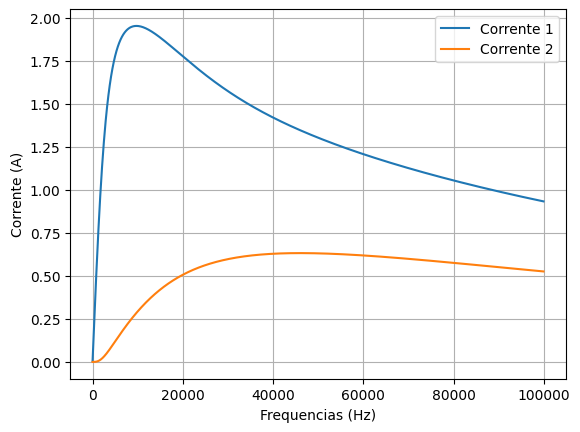

In [27]:
frequencias = range(10,100000,100)
correntes_1 = []
correntes_2 = []
for f in frequencias:
    I1 = correntes(f,0.6)[0]
    I2 = correntes(f,0.6)[1]
    correntes_1.append(abs(I1))
    correntes_2.append(abs(I2))

plt.plot(frequencias,correntes_1, label='Corrente 1')
plt.plot(frequencias,correntes_2, label='Corrente 2')
plt.legend()
plt.xlabel('Frequencias (Hz)')
plt.ylabel('Corrente (A)')
plt.grid()
plt.show()

    

In [28]:
#fazer função que prove isso
ind_freq_corr_max_1 = correntes_1.index(max(correntes_1))
ind_freq_corr_max_2 = correntes_2.index(max(correntes_2))
freq_corr_max_1 = frequencias[ind_freq_corr_max_1]
freq_corr_max_2 = frequencias[ind_freq_corr_max_2]
fressonancia = 1/(2*pi*sqrt(L2*C2))
fressonancia,freq_corr_max_1,freq_corr_max_2

print(f"A corrente máxima de ressonância é {fressonancia} e a frequência em que as correntes são máximas é {freq_corr_max_2}")

A corrente máxima de ressonância é 11253.953951963826 e a frequência em que as correntes são máximas é 46010


Quando as correntes são máximas, a frequência correspondentes são iguais a de ressonância? 

$F_r = 11253.95$ 
 $F_m1 = 8510$
 $F_m2 = 99910$

R: Como podemos ver não são as mesmas, apesar de que no caso da corrente I1, a frequência quando esta chega ao seu valor máximo se aproxima mais da frequência de ressônancia


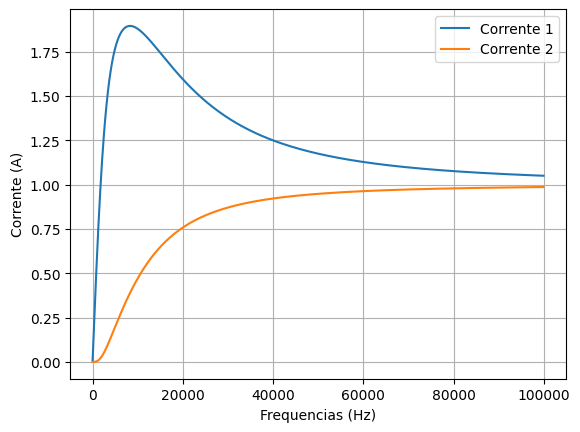

In [31]:
#com o k alterado para 1 (aumento de 0.4)
frequencias = range(10,100000,100)
correntes_1 = []
correntes_2 = []
for f in frequencias:
    I1 = correntes(f,1)[0]
    I2 = correntes(f,1)[1]
    correntes_1.append(abs(I1))
    correntes_2.append(abs(I2))

plt.plot(frequencias,correntes_1, label='Corrente 1')
plt.plot(frequencias,correntes_2, label='Corrente 2')
plt.legend()
plt.xlabel('Frequencias (Hz)')
plt.ylabel('Corrente (A)')
plt.grid()
plt.show()


### 3- Escolha da Frequência de operação do circuito

In [32]:

def V2 (L, fr):
    #definindo variavéis
    C = 1/(fr**2*4*pi**2*L)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 1
    Rc = 400
    k = 0.1
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

In [33]:
#definindo valores de V2 pra cada indutância e assim para cada frequência
indutancias = [50e-6,100e-6,200e-6,300e-6,400e-6,500e-6]
freq_reson = range(1,100000,100)

In_lis = [[],[],[],[],[],[]]


for L in indutancias:
        for fr in freq_reson:
            In_lis[indutancias.index(L)].append(abs(V2(L,fr)))


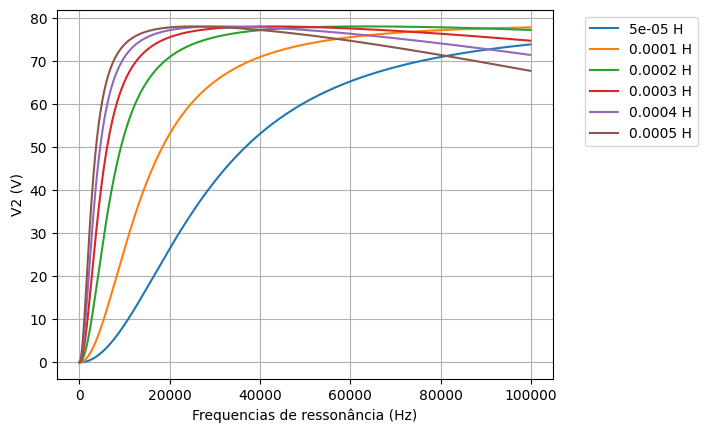

In [34]:
#plotando os gráficos
for i in range(0,6):
    plt.plot(freq_reson,In_lis[i],label=f'{indutancias[i]} H')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('V2 (V)')
plt.grid()
plt.show()

In [13]:
def V2_2 (C, fr):
    #definindo variavéis
    L = 1/(fr**2*4*pi**2*C)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 1
    Rc = 400
    k = 0.1
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

78.01398782979376
78.01400987622006
78.01397455656729
78.00173249920536
78.01360699819247


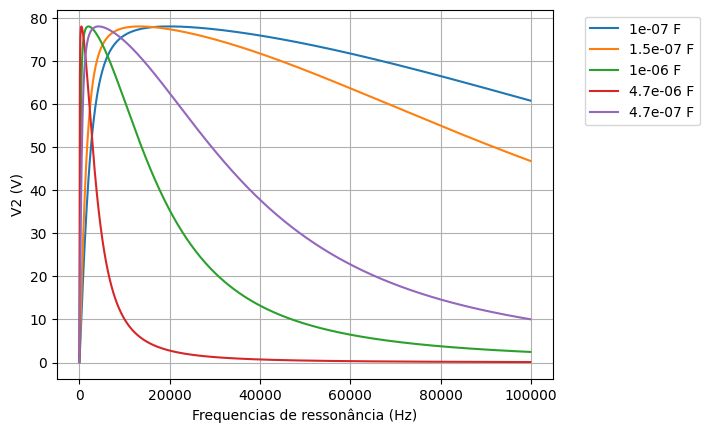

In [14]:
capacitores = [0.1e-6,150e-9,1e-6,4.7e-6,0.47e-6]

freq_reson = range(1,100000,100)

In_lis89 = [[],[],[],[],[],[]]


for C in capacitores:
    for fr in freq_reson:
        In_lis89[capacitores.index(C)].append(abs(V2_2(C,fr)))
        
    print(max(In_lis89[capacitores.index(C)]))



#plotando os gráficos
for i in range(0,5):
    plt.plot(freq_reson,In_lis89[i],label=f'{capacitores[i]} F')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('V2 (V)')
plt.grid()
plt.show()



#1.5 e-07

## 5)

In [15]:
#S = P + jQ -> queremos o P
#S = Vef * Ief*

#definindo função para calcular o P
def potencia_real(L, fr):
    #definindo variavéis
    C = 1/(fr**2*4*pi**2*L)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 5
    Rc = 4
    k = 0.7
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I1 = dot(linalg.inv(A),V)[0]
    I2 = dot(linalg.inv(A),V)[1]

    #V2
    V2 = ZeqCRc*I2
    
    #cálculo da potência real
    S1 = (Uf/sqrt(2)) * (I1/sqrt(2)).conjugate()
    S2 = (V2/sqrt(2))* (I2/sqrt(2)).conjugate()
    P1 = S1.real
    P2 = S2.real
    return P1, P2

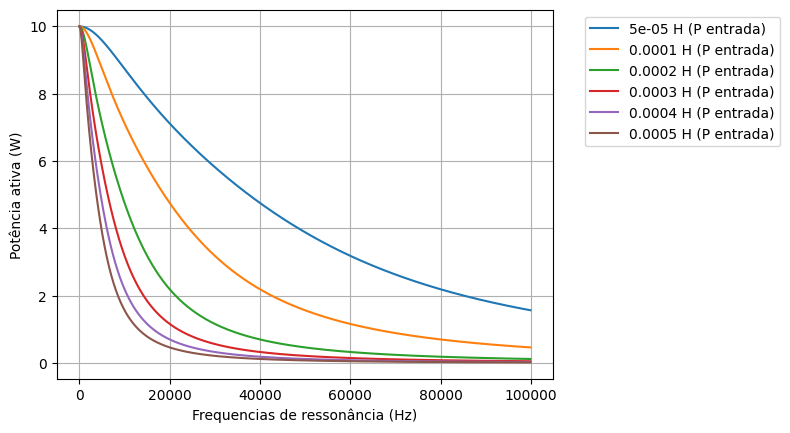

In [16]:
#plotando os gráficos
In_lis2 = [[],[],[],[],[],[]]
In_lis3 = [[],[],[],[],[],[]]
for L in indutancias:
        for fr in freq_reson:
            In_lis2[indutancias.index(L)].append(abs(potencia_real(L,fr)[0]))
            


for i in range(0,6):
    plt.plot(freq_reson,In_lis2[i],label=f'{indutancias[i]} H (P entrada)')


plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Potência ativa (W)')
plt.grid()
plt.show()

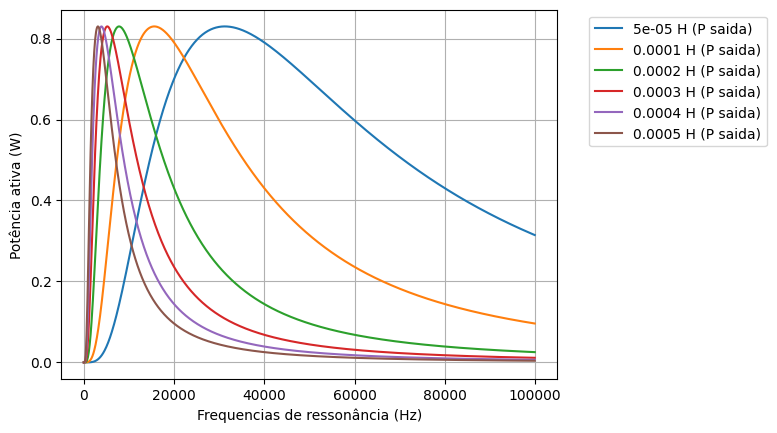

In [17]:
In_lis7 = [[],[],[],[],[],[]]

for L in indutancias:
        for fr in freq_reson:
            In_lis7[indutancias.index(L)].append(abs(potencia_real(L,fr)[1]))
            


for i in range(0,6):
    plt.plot(freq_reson,In_lis7[i],label=f'{indutancias[i]} H (P saida)')


plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Potência ativa (W)')
plt.grid()
plt.show()

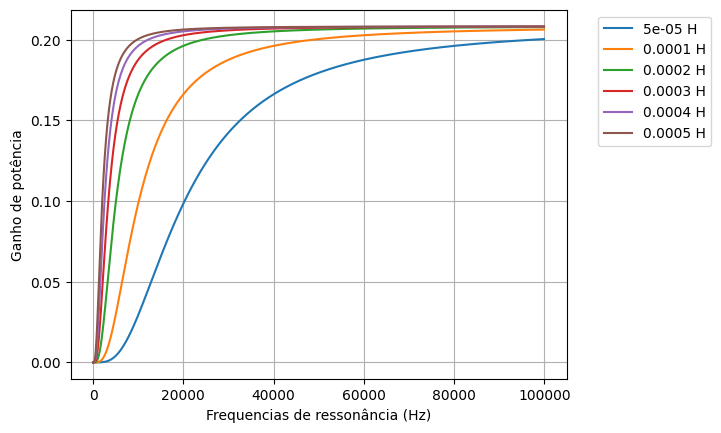

In [18]:
#ganho de potência P = P2/P1
In_lis4 = [[],[],[],[],[],[]]
for L in indutancias:
        for fr in freq_reson:
            In_lis4[indutancias.index(L)].append(abs(potencia_real(L,fr)[1]/potencia_real(L,fr)[0]))
            
for i in range(0,6):
    plt.plot(freq_reson,In_lis4[i],label=f'{indutancias[i]} H') 

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Ganho de potência')
plt.grid()
plt.show()


## 6)